In [ ]:
import pandas as pd

data = {
    "Height": [65.8, 71.5, 69.4, 68.2, 67.8, 68.7, 69.8, 70.1, 67.9, 66.8],
    "Weight": [112, 136, 153, 142, 144, 123, 141, 136, 112, 120],
    "Age": [30, 19, 45, 22, 29, 50, 51, 23, 17, 39],
    "Grip Strength": [30, 31, 29, 28, 24, 26, 22, 20, 19, 31],
    "Frailty": ["N", "N", "N", "Y", "Y", "N", "Y", "Y", "N", "N"]
}

df = pd.DataFrame(data)

print("Raw Data:")
print(df)


df.to_csv("frailty_data.csv", index=False)

df = pd.read_csv("frailty_data.csv")

print("\nLoaded Raw Data:")
print(df)

df["Frailty"] = df["Frailty"].apply(lambda x: 1 if x == "Y" else 0)

print("\nCleaned Data:")
print(df)

df.to_csv("cleaned_frailty_data.csv", index=False)


Raw Data:
   Height  Weight  Age  Grip Strength Frailty
0    65.8     112   30             30       N
1    71.5     136   19             31       N
2    69.4     153   45             29       N
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y
5    68.7     123   50             26       N
6    69.8     141   51             22       Y
7    70.1     136   23             20       Y
8    67.9     112   17             19       N
9    66.8     120   39             31       N

Loaded Raw Data:
   Height  Weight  Age  Grip Strength Frailty
0    65.8     112   30             30       N
1    71.5     136   19             31       N
2    69.4     153   45             29       N
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y
5    68.7     123   50             26       N
6    69.8     141   51             22       Y
7    70.1     136   23             20       Y
8    67.9     112   17             19       N
9    6

EDA results have been written to results.txt
Processed data saved successfully.
Model evaluation results have been appended to results.txt


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Saved: ../results/correlation_heatmap.png


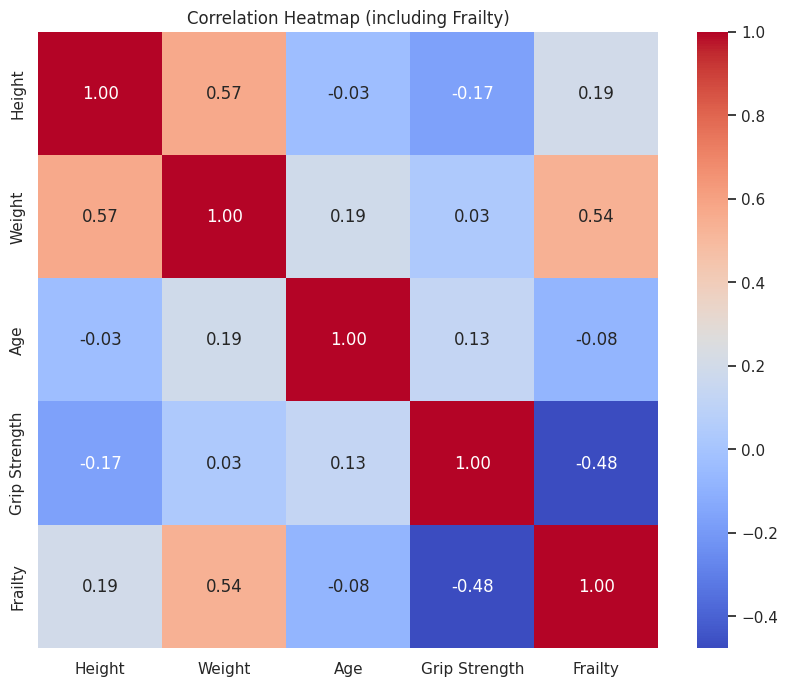

Saved: ../results/grip_vs_age_frailty.png


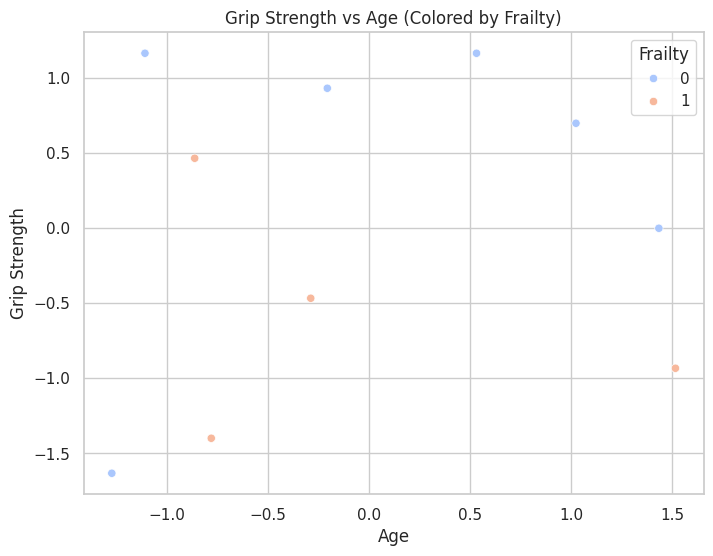

<ipython-input-3-3c714ff7f5b0>:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=processed_df, x="Frailty", y="Grip Strength", palette="coolwarm")


Saved: ../results/grip_strength_frailty_boxplot.png


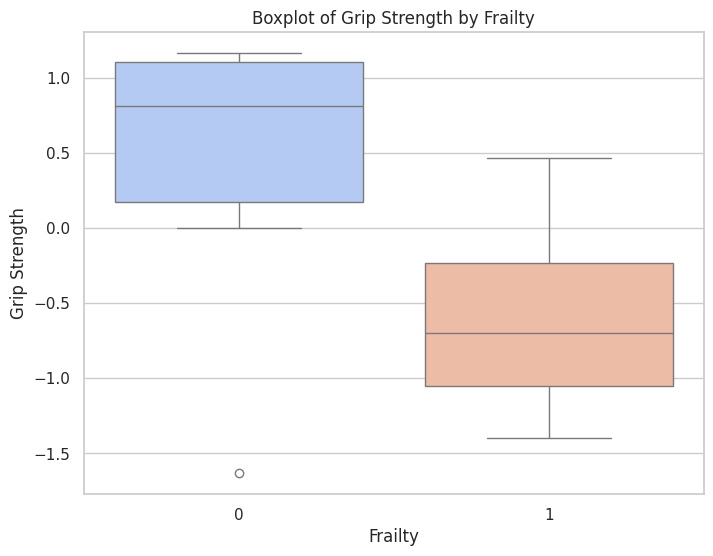

Saved: ../results/confusion_matrix.png


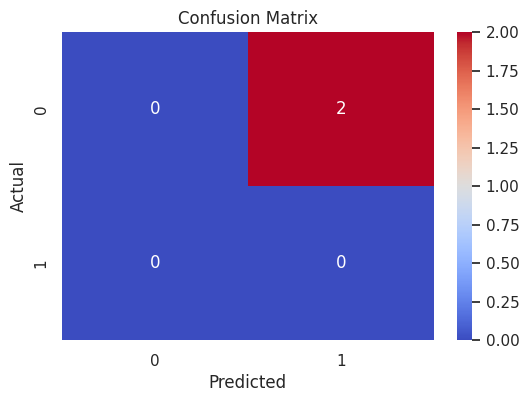

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Saved: ../results/roc_curve.png


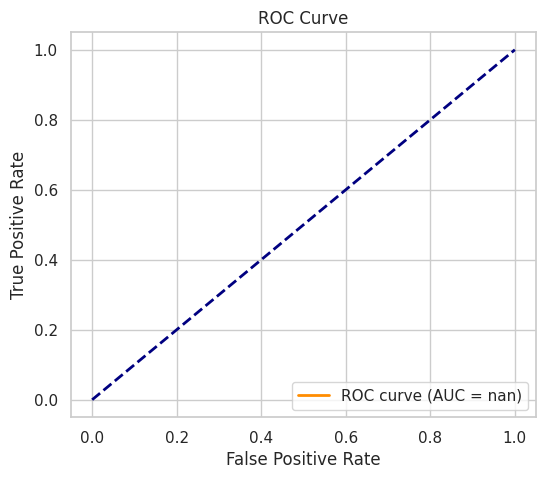

Analysis complete. All results and visualizations have been saved.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

def save_plot(plot, filename, width=8, height=6):
    plot.savefig(filename, bbox_inches="tight", dpi=300)
    print(f"Saved: {filename}")

def load_and_preprocess_data():
    df = pd.read_csv("/content/frailty_data.csv")

    X = df.drop("Frailty", axis=1)
    y = df["Frailty"]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    processed_df = pd.DataFrame(X_scaled, columns=X.columns)
    processed_df["Frailty"] = y

    processed_df.to_csv("/content/frailty_data.csv", index=False)
    print("Processed data saved successfully.")

    return processed_df


import os
from scipy.stats import ttest_ind

def perform_eda(processed_df):
    results_dir = "../results"
    results_file = os.path.join(results_dir, "results.txt")

    os.makedirs(results_dir, exist_ok=True)

    with open(results_file, "w") as f:
        f.write("Summary statistics of processed data:\n")
        f.write(str(processed_df.describe()) + "\n")

        if "Grip Strength" not in processed_df.columns:
            raise KeyError("Column 'Grip Strength' not found in the DataFrame.")
        if "Frailty" not in processed_df.columns:
            raise KeyError("Column 'Frailty' not found in the DataFrame.")

        # Convert 'Frailty' column to numeric (1 for 'Y', 0 for 'N')
        processed_df["Frailty"] = processed_df["Frailty"].map({'Y': 1, 'N': 0})

        correlation = processed_df["Grip Strength"].corr(processed_df["Frailty"])
        f.write(f"\nCorrelation between Grip Strength and Frailty: {correlation:.2f}\n")


        mean_grip_frail = processed_df.loc[processed_df["Frailty"] == 1, "Grip Strength"].mean()
        mean_grip_non_frail = processed_df.loc[processed_df["Frailty"] == 0, "Grip Strength"].mean()
        f.write(f"\nMean grip strength for frail participants: {mean_grip_frail:.2f} kg\n")
        f.write(f"Mean grip strength for non-frail participants: {mean_grip_non_frail:.2f} kg\n")

        # Perform t-test
        t_test_result = ttest_ind(
            processed_df.loc[processed_df["Frailty"] == 1, "Grip Strength"],
            processed_df.loc[processed_df["Frailty"] == 0, "Grip Strength"]
        )
        f.write("\nt-test results comparing grip strength between frail and non-frail groups:\n")
        f.write(str(t_test_result) + "\n")



print("EDA results have been written to results.txt")


# Train and evaluate model
def train_and_evaluate_model(processed_df):
    # Split data into train and test sets
    X = processed_df.drop("Frailty", axis=1)
    y = processed_df["Frailty"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    with open("../results/results.txt", "a") as f:
        f.write("\nModel Evaluation Results:\n")
        f.write(f"Accuracy: {accuracy:.2f}\n")
        f.write("\nConfusion Matrix:\n")
        f.write(str(conf_matrix) + "\n")
        f.write("\nClassification Report:\n")
        f.write(str(class_report) + "\n")

    print("Model evaluation results have been appended to results.txt")

    return {"y_pred_proba": y_pred_proba, "y_test": y_test, "conf_matrix": conf_matrix}





# Create visualizations
def create_visualizations(processed_df, model_results):
    # Correlation Heatmap
    plt.figure(figsize=(10, 8))
    correlation_matrix = processed_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap (including Frailty)")
    save_plot(plt, "../results/correlation_heatmap.png")
    plt.show()

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=processed_df, x="Age", y="Grip Strength", hue="Frailty", palette="warm")
    plt.title("Grip Strength vs Age (Colored by Frailty)")
    save_plot(plt, "../results/grip_vs_age_frailty.png")
    plt.show()

    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=processed_df, x="Frailty", y="Grip Strength", palette="warm")
    plt.title("Boxplot of Grip Strength by Frailty")
    save_plot(plt, "../results/grip_strength_frailty_boxplot.png")
    plt.show()

    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(model_results["conf_matrix"], annot=True, fmt="d", cmap="coolwarm")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    save_plot(plt, "../results/confusion_matrix.png")
    plt.show()


    # ROC Curve
    fpr, tpr, _ = roc_curve(model_results["y_test"], model_results["y_pred_proba"])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color="orange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    save_plot(plt, "../results/roc_curve.png")
    plt.show()


def main():
    processed_df = load_and_preprocess_data()
    perform_eda(processed_df)
    model_results = train_and_evaluate_model(processed_df)
    create_visualizations(processed_df, model_results)
    print("Analysis complete. All results and visualizations have been saved.")

main()


